In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
fbi = pd.read_csv('fbi_reports.csv')

us_pop = pd.read_csv('US_Population.csv')

c:\users\johna\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# removes all rows where the record has a victim age of 998
fbi = fbi.ix[lambda df: df['Victim Age'] < 122, :]

fbi.drop(['Record Source'],inplace=True,axis=1)
fbi.drop(['Agency Code'],inplace=True,axis=1)
fbi.drop(['Agency Name'],inplace=True,axis=1)
fbi.drop(['Agency Type'],inplace=True,axis=1)

In [5]:
fbi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637480 entries, 0 to 638453
Data columns (total 20 columns):
Record ID                637480 non-null int64
City                     637480 non-null object
State                    637480 non-null object
Year                     637480 non-null int64
Month                    637480 non-null object
Incident                 637480 non-null int64
Crime Type               637480 non-null object
Crime Solved             637480 non-null object
Victim Sex               637480 non-null object
Victim Age               637480 non-null int64
Victim Race              637480 non-null object
Victim Ethnicity         637480 non-null object
Perpetrator Sex          637480 non-null object
Perpetrator Age          637480 non-null object
Perpetrator Race         637480 non-null object
Perpetrator Ethnicity    637480 non-null object
Relationship             637480 non-null object
Weapon                   637480 non-null object
Victim Count             6374

In [6]:
us_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
Year                 35 non-null int64
US_Population        35 non-null int64
black_population     4 non-null float64
white_population     4 non-null float64
asian_population     4 non-null float64
native_population    4 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.7 KB


In [7]:
fbi.head()

,Record ID,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,2,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
2,3,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0
3,4,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0
4,5,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1


In [8]:
# removes the record id and year columns
fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].describe()

,Incident,Victim Age,Victim Count,Perpetrator Count
count,637480.000000,637480.000000,637480.000000,637480.000000
mean,22.988102,33.562204,0.123303,0.185308
std,92.213585,17.792594,0.537756,0.585502
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000
50%,2.000000,30.000000,0.000000,0.000000
75%,10.000000,42.000000,0.000000,0.000000
max,999.000000,99.000000,10.000000,10.000000


In [9]:
fbi.loc[:, ['Incident', 'Victim Age', 'Victim Count', 'Perpetrator Count']].corr()

,Incident,Victim Age,Victim Count,Perpetrator Count
Incident,1.000000,-0.004339,0.001815,0.001948
Victim Age,-0.004339,1.000000,-0.021997,-0.032754
Victim Count,0.001815,-0.021997,1.000000,0.067106
Perpetrator Count,0.001948,-0.032754,0.067106,1.000000


# Incidents by Year

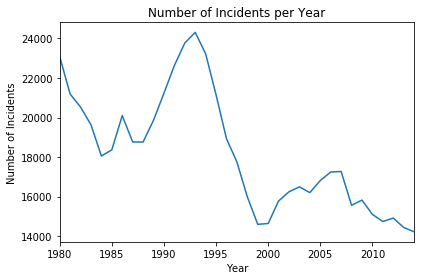

In [95]:
fbi['Year'].value_counts().sort_index(ascending=True).plot()
plt.tight_layout()
plt.title('Number of Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.tight_layout()

The general number of crimes has followed a downward trend since 1980, despite an uptick of incidents in the early 1990s.

# Crime Types

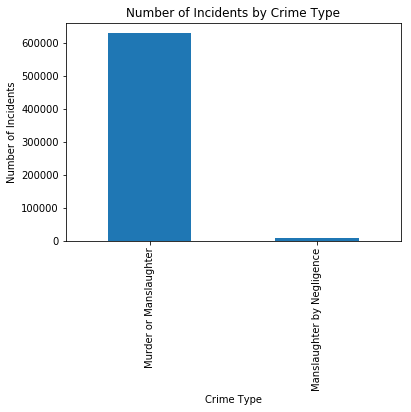

In [98]:
fbi['Crime Type'].value_counts().plot(kind='bar')

(628372 / (628372 + 9108)) * 100    # percentage of crimes that are Murder or Manslaughter
plt.title('Number of Incidents by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')

The crime type reports are heavily skewed in favor of 'Murder or Manslaughter'.

# Crime Solved?

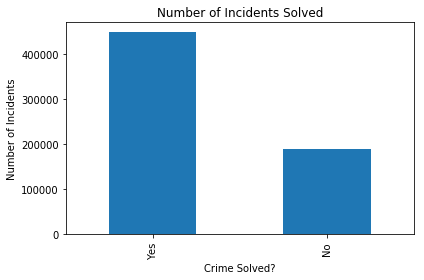

In [99]:
fbi['Crime Solved'].value_counts().plot(kind='bar')
plt.title('Number of Incidents Solved')
plt.xlabel('Crime Solved?')
plt.ylabel('Number of Incidents')
plt.tight_layout()

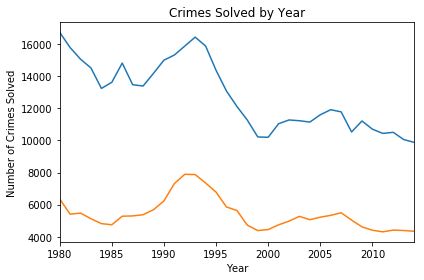

In [55]:
# plots the number of crimes solved over time
fbi_crimes_solved_y = fbi.ix[lambda df: df['Crime Solved'] == 'Yes', :]
fbi_crimes_solved_y.groupby('Year').count()['Crime Solved'].plot()

# plots the number of crimes that were NOT solved over time
fbi_crimes_solved_n = fbi.ix[lambda df: df['Crime Solved'] == 'No', :]
fbi_crimes_solved_n.groupby('Year').count()['Crime Solved'].plot()

plt.title('Crimes Solved by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Solved')
plt.tight_layout()

# Victim Ages

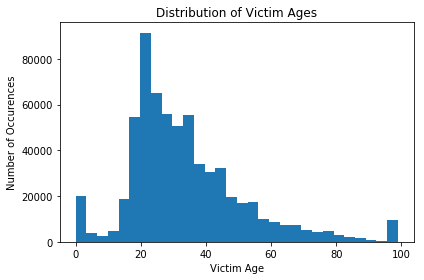

In [54]:
plt.hist(fbi['Victim Age'], bins=30)
plt.title('Distribution of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Number of Occurences')
plt.tight_layout()

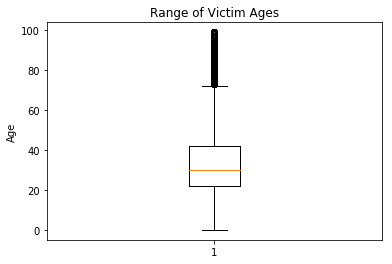

In [66]:
plt.boxplot(fbi['Victim Age'])
plt.title('Range of Victim Ages')
plt.ylabel('Age')


# remove the 1

# Weapon Usage in Incidents

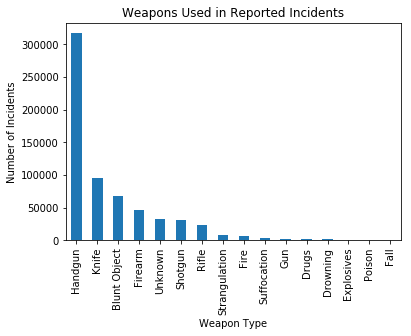

In [101]:
fbi['Weapon'].value_counts().plot(kind='bar')
plt.title('Weapons Used in Reported Incidents')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Incidents')

Handguns are by far the weapon of choice for most perpetrators.

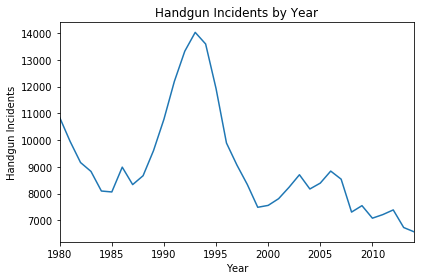

In [70]:
fbi_handgun = fbi.ix[lambda df: df['Weapon'] == 'Handgun', :]
fbi_handgun.groupby('Year').count()['Weapon'].plot()

plt.title('Handgun Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Handgun Incidents')
plt.tight_layout()

# FBI Reports by Location

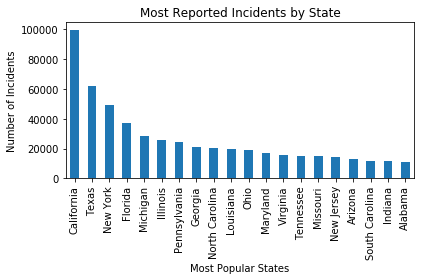

In [74]:
fbi['State'].value_counts()[:20].plot(kind='bar')
plt.title('Most Reported Incidents by State')
plt.xlabel('Most Popular States')
plt.ylabel('Number of Incidents')
plt.tight_layout()

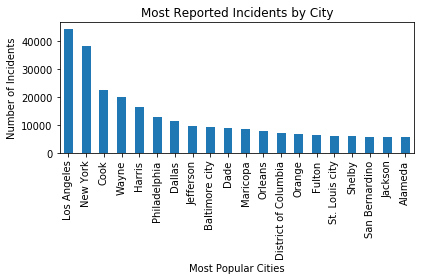

In [73]:
fbi['City'].value_counts()[:20].plot(kind='bar')
plt.title('Most Reported Incidents by City')
plt.xlabel('Most Popular Cities')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# Incidents by Relationship

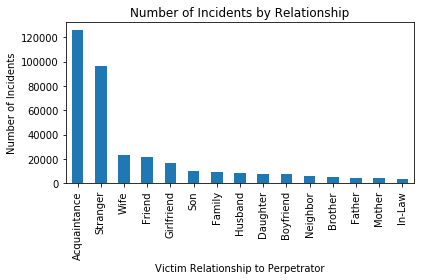

In [75]:
# removes unknown values from relationship column
fbi_rel = fbi.ix[lambda df: df['Relationship'] != 'Unknown', :]


fbi_rel['Relationship'].value_counts()[:15].plot(kind='bar')

plt.title('Number of Incidents by Relationship')
plt.xlabel('Victim Relationship to Perpetrator')
plt.ylabel('Number of Incidents')
plt.tight_layout()

# FBI Reports Victim Groups

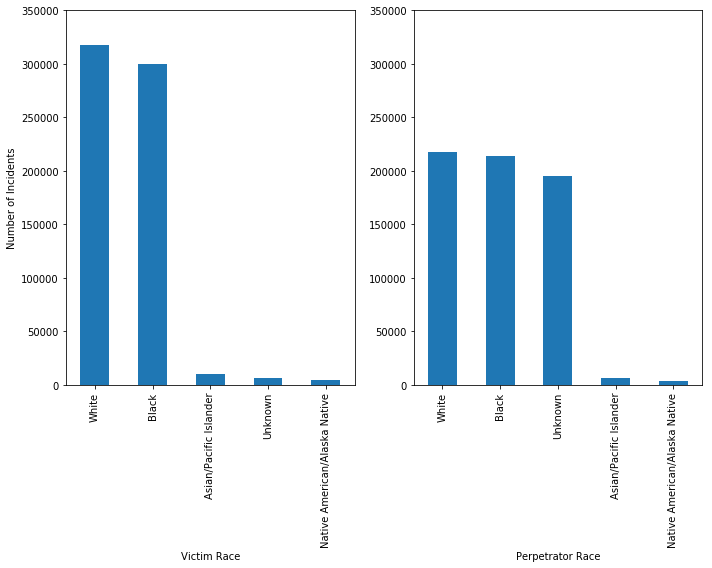

In [102]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
fbi['Victim Race'].value_counts().plot(kind='bar')
plt.xlabel('Victim Race')
plt.ylabel('Number of Incidents')
plt.ylim(0, 350000)

plt.subplot(1, 2, 2)
fbi['Perpetrator Race'].value_counts().plot(kind='bar')
plt.xlabel('Perpetrator Race')
plt.ylim(0, 350000)

plt.tight_layout()

Of course the majority groups are going to have the most incidents.

I would like to normalize this data and figure out the rates for every 100,000 people in a particular racial group.

In [22]:
# shows the distinct values for a Victim's Race
fbi['Victim Race'].value_counts()

White                            317285
Black                            299788
Asian/Pacific Islander             9888
Unknown                            5954
Native American/Alaska Native      4565
Name: Victim Race, dtype: int64

In [29]:
# shows the distinct values for a Victim's Ethnicity
fbi['Victim Ethnicity'].value_counts()

Unknown         367379
Not Hispanic    197465
Hispanic         72636
Name: Victim Ethnicity, dtype: int64

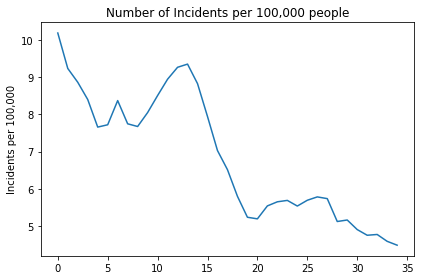

In [78]:
x = fbi.groupby('Year').count()['Crime Solved']
y = us_pop['US_Population']

# finds the ratio of incidents per 100,000  
z = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(z)
plt.title('Number of Incidents per 100,000 people')
plt.ylabel('Incidents per 100,000')
plt.tight_layout()

# Incidents by Victim Race 

### Incidents Concerning Black Victims

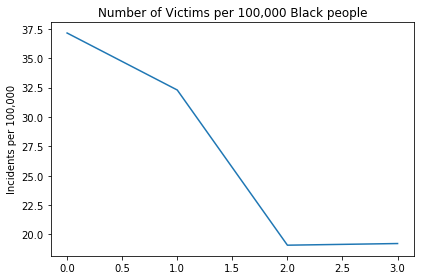

In [80]:
black_incidents = fbi[fbi['Victim Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(black_vic)
plt.title('Number of Victims per 100,000 Black people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning White Victims

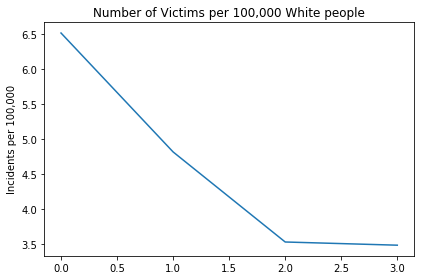

In [81]:
white_incidents = fbi[fbi['Victim Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(white_vic)
plt.title('Number of Victims per 100,000 White people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning Asian Victims

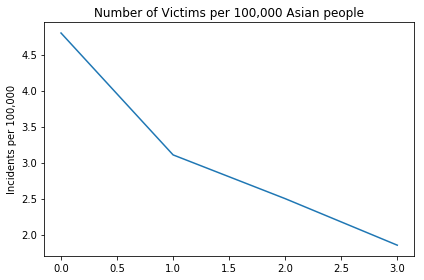

In [82]:
asian_incidents = fbi[fbi['Victim Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_vic = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(asian_vic)
plt.title('Number of Victims per 100,000 Asian people')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

### Incidents Concerning Native American Victims

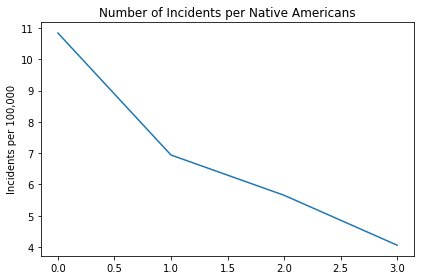

In [83]:
native_incidents = fbi[fbi['Victim Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_vic = [i/j * 100000 for i,j in zip(x, y)]
native_vic
plt.plot(native_vic)
plt.title('Number of Incidents per Native Americans')
plt.ylabel('Victims per 100,000')
plt.tight_layout()

In [86]:
# using a Non-parametric test as the values I am testing for are not normally distributed
# method for testing whether samples originate from the same distribution
# running a Kruskal-Wallis test as I am comparing 3+ independent groups

stats.kruskal(black_vic, white_vic, native_vic, asian_vic)

KruskalResult(statistic=11.933823529411768, pvalue=0.0076133254616832036)

In [ ]:
# the p-value is .007 or 0.7%
# 5% is the normal cutoff

# p-value is a measure of the sampling error 
# p-value is a measure of statistical uncertainty
# for a low p-value, the results are ‘statistically’ significant

# Incidents by Perpetrator Race

### Incidents concerning Black perpetrators

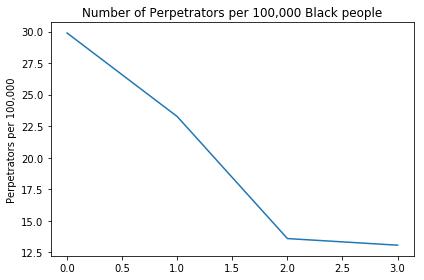

In [89]:
black_incidents = fbi[fbi['Perpetrator Race'] == 'Black']

x = black_incidents.groupby('Year').count()['Crime Solved'].iloc[0], black_incidents.groupby('Year').count()['Crime Solved'].iloc[9], black_incidents.groupby('Year').count()['Crime Solved'].iloc[19], black_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['black_population'][0], us_pop['black_population'][10], us_pop['black_population'][20], us_pop['black_population'][30]

black_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(black_perp)
plt.title('Number of Perpetrators per 100,000 Black people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning White perpetrators

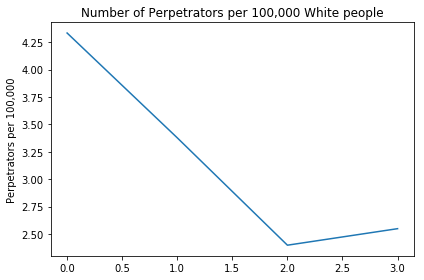

In [88]:
white_incidents = fbi[fbi['Perpetrator Race'] == 'White']

x = white_incidents.groupby('Year').count()['Crime Solved'].iloc[0], white_incidents.groupby('Year').count()['Crime Solved'].iloc[9], white_incidents.groupby('Year').count()['Crime Solved'].iloc[19], white_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['white_population'][0], us_pop['white_population'][10], us_pop['white_population'][20], us_pop['white_population'][30]

white_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(white_perp)
plt.title('Number of Perpetrators per 100,000 White people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning Asian perpetrators

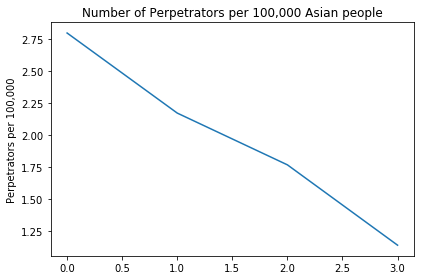

In [90]:
asian_incidents = fbi[fbi['Perpetrator Race'] == 'Asian/Pacific Islander']

x = asian_incidents.groupby('Year').count()['Crime Solved'].iloc[0], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[9], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[19], asian_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['asian_population'][0], us_pop['asian_population'][10], us_pop['asian_population'][20], us_pop['asian_population'][30]

asian_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(asian_perp)
plt.title('Number of Perpetrators per 100,000 Asian people')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

### Incidents concerning Native American perpetrators

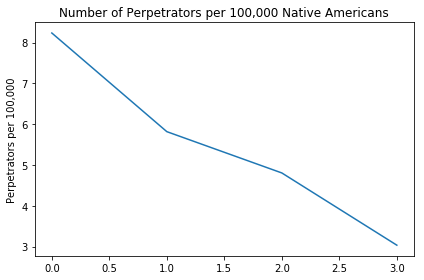

In [92]:
native_incidents = fbi[fbi['Perpetrator Race'] == 'Native American/Alaska Native']

x = native_incidents.groupby('Year').count()['Crime Solved'].iloc[0], native_incidents.groupby('Year').count()['Crime Solved'].iloc[9], native_incidents.groupby('Year').count()['Crime Solved'].iloc[19], native_incidents.groupby('Year').count()['Crime Solved'].iloc[29]

y = us_pop['native_population'][0], us_pop['native_population'][10], us_pop['native_population'][20], us_pop['native_population'][30]

native_perp = [i/j * 100000 for i,j in zip(x, y)]
plt.plot(native_perp)
plt.title('Number of Perpetrators per 100,000 Native Americans')
plt.ylabel('Perpetrators per 100,000')
plt.tight_layout()

In [40]:
# using a Non-parametric test as the values I am testing for are not normally distributed
# method for testing whether samples originate from the same distribution
# running a Kruskal-Wallis test as I am comparing 3+ independent groups

stats.kruskal(black_perp, white_perp, asian_perp, native_perp)

KruskalResult(statistic=12.794117647058826, pvalue=0.0051036675550819692)

In [ ]:
# the p-value is .005 or 0.5%
# 5% is the normal cutoff

# p-value is a measure of the sampling error 
# p-value is a measure of statistical uncertainty
# for a low p-value, the results are ‘statistically’ significant